In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts
import numpy as np

In [2]:
#importando csv colocando separardor
dataset = pd.read_csv('Churn.csv', sep= ';')
#vizualizando a "cabeça"
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [3]:
#verificando que tem 999 linhas e 12 colunas
dataset.shape

(999, 12)

In [4]:
#trocando nomes das colunas
dataset.columns = ['Id', 'Score','Estado','Genero','Idade', 'Patrimonio','Saldo','Produtos','TemCartaoCredito','Ativo','Salario','Saiu']
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [5]:
#explorando dados categóricos
#por Estado e tamanho dos dados
agrupado = dataset.groupby(['Estado']).size()
agrupado

#RP e TD não existem,  SP está fora do estado de negócio

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

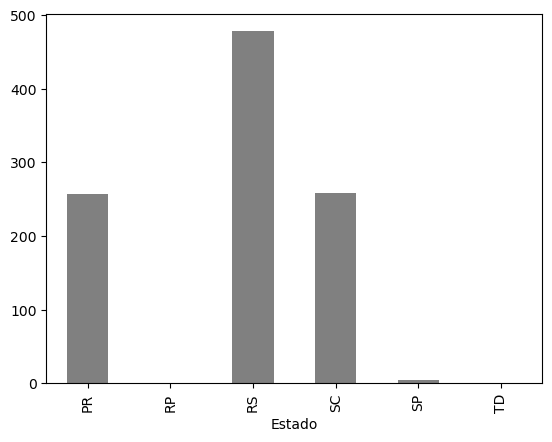

In [6]:
agrupado.plot.bar(color= 'gray')

In [7]:
#por gênero
agrupado2 = dataset.groupby(['Genero']).size()
agrupado2

#tamém com inconsistência

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Genero'>

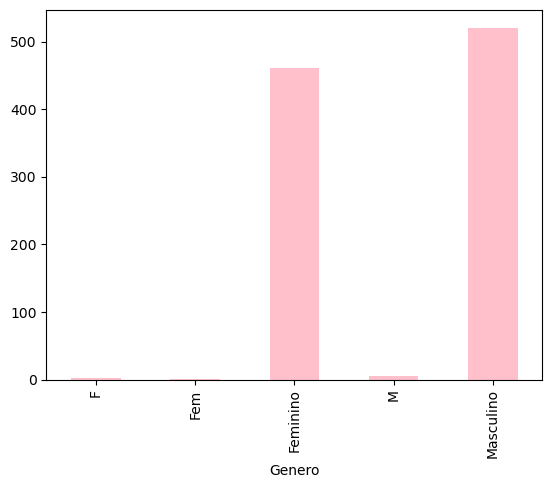

In [8]:
agrupado2.plot.bar(color='pink')

In [9]:
#explorar colunas numéricas
#pelo Score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

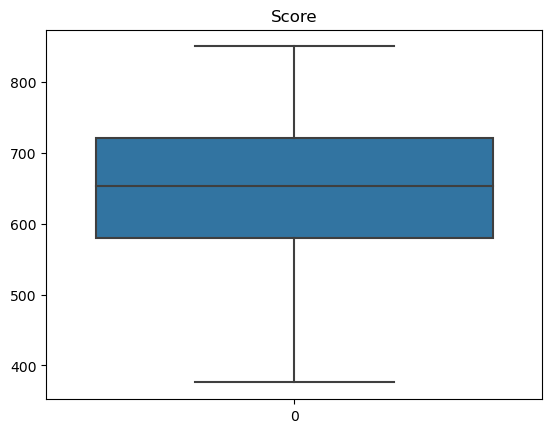

In [10]:
srn.boxplot(dataset['Score']).set_title('Score')

Text(0.5, 1.0, 'Score')

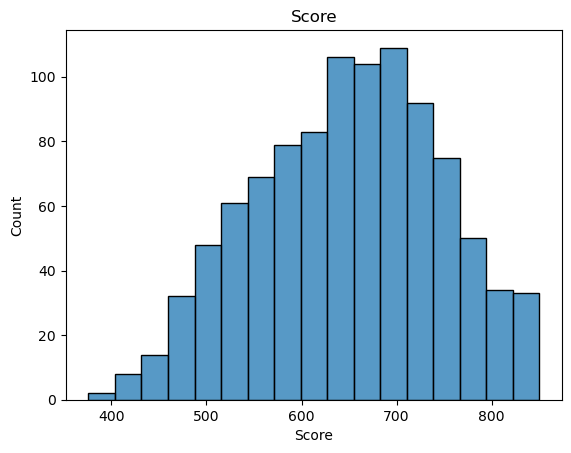

In [11]:
srn.histplot(dataset['Score']).set_title('Score')

In [12]:
#por idade
dataset['Idade'].describe()

#erros foram vistos como idade mínima de -20 e idade máxima de 140. Dados inconsistentes.

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

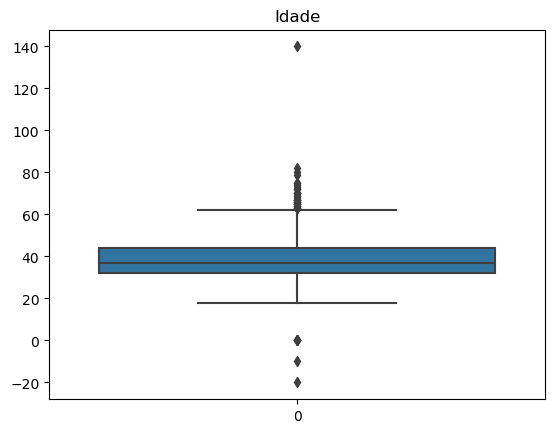

In [13]:
srn.boxplot(dataset['Idade']).set_title('Idade')

Text(0.5, 1.0, 'Idade')

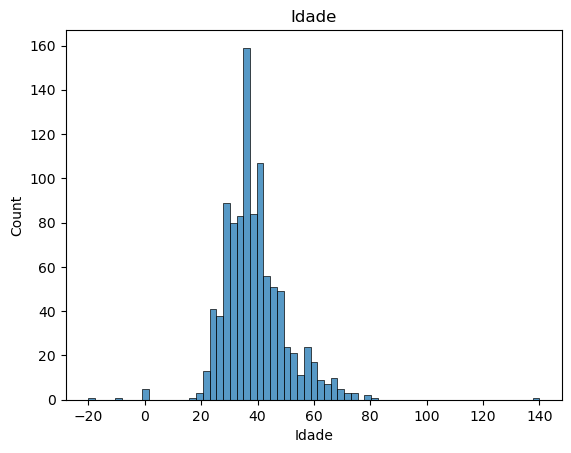

In [14]:
srn.histplot(dataset['Idade']).set_title('Idade')

In [15]:
#Pelo Saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

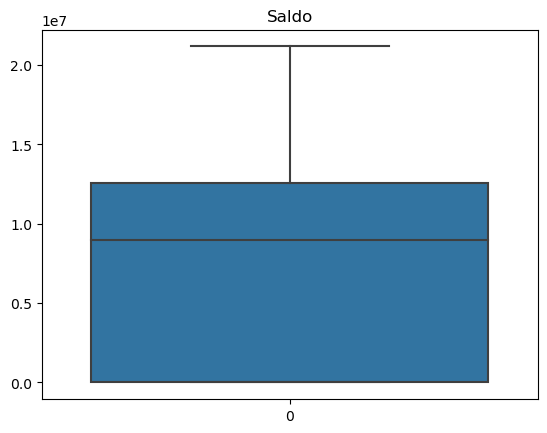

In [16]:
srn.boxplot(dataset['Saldo']).set_title('Saldo')

C:\Users\romulo\AppData\Local\Temp\ipykernel_11564\3978263718.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Saldo']).set_title('Saldo')


Text(0.5, 1.0, 'Saldo')

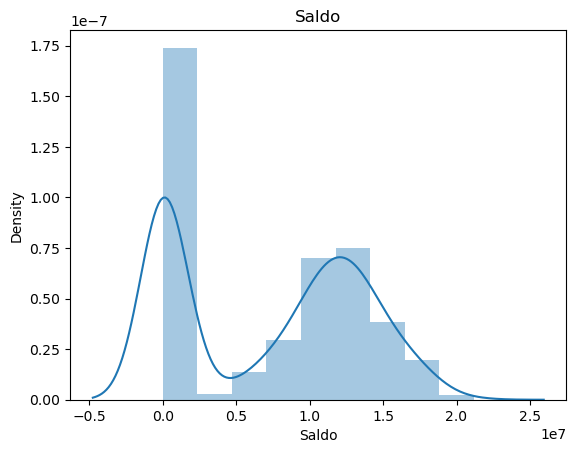

In [17]:
srn.distplot(dataset['Saldo']).set_title('Saldo')

In [18]:
#Pelo Salário
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

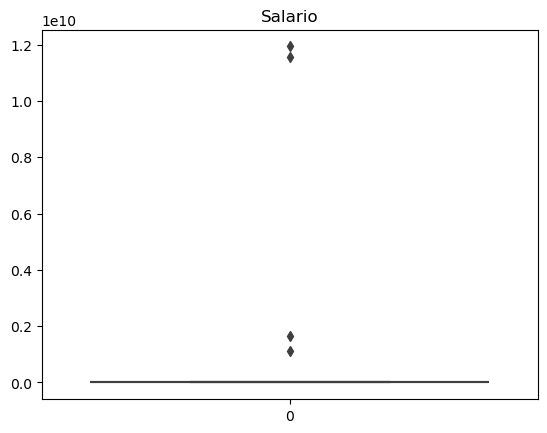

In [19]:
srn.boxplot(dataset['Salario']).set_title('Salario')

Text(0.5, 1.0, 'Salario')

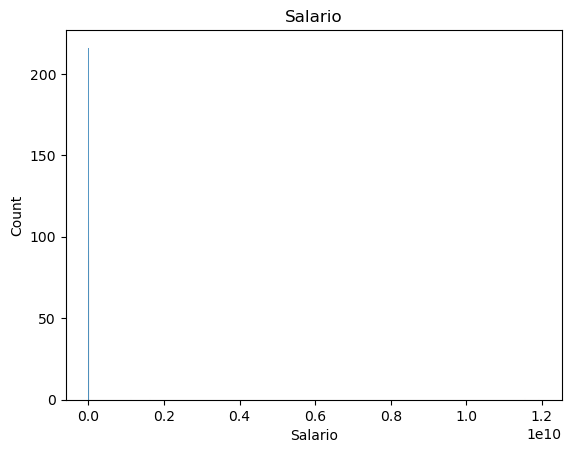

In [20]:
srn.histplot(dataset['Salario']).set_title('Salario')

In [21]:
#contando valores NaN
#genero e salario
dataset.isnull().sum()

Id                  0
Score               0
Estado              0
Genero              8
Idade               0
Patrimonio          0
Saldo               0
Produtos            0
TemCartaoCredito    0
Ativo               0
Salario             7
Saiu                0
dtype: int64

In [22]:
#fazendo a mediana de Salario

medianaSalario = sts.median(dataset['Salario'])
medianaSalario

70518.0

In [23]:
#substituindo valores NaN pela mediana

dataset['Salario'].fillna(medianaSalario, inplace= True)

dataset.isnull().sum()

Id                  0
Score               0
Estado              0
Genero              8
Idade               0
Patrimonio          0
Saldo               0
Produtos            0
TemCartaoCredito    0
Ativo               0
Salario             0
Saiu                0
dtype: int64

In [24]:
#verificando Gêneros errados e os substituindo
#agrupar e vizualizar

agrupadoGenero = dataset.groupby(dataset['Genero']).size()
agrupadoGenero

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [25]:
#verificando o total de NaN's

dataset['Genero'].isnull().sum()

8

In [26]:
#preencher  os Nan's com Masculino por conta de ser a Moda

dataset['Genero'].fillna('Masculino', inplace= True)

dataset['Genero'].isnull().sum()

0

In [27]:
agrupadoReal = dataset.groupby(dataset['Genero']).size()
agrupadoReal

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    529
dtype: int64

In [28]:
#Ajustando o M para Masculino no dataset
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = 'Masculino'

In [29]:
#verificando se houve o ajuste, a substituição
agrupadoGeneroM = dataset.groupby(dataset['Genero']).size()

agrupadoGeneroM

Genero
F              2
Fem            1
Feminino     461
Masculino    535
dtype: int64

In [30]:
#Ajustando O M e O Fem para o Feminino no dataset
dataset.loc[dataset['Genero'].isin(['F','Fem'])] = 'Feminino'

agrupadoFinal = dataset.groupby(dataset['Genero']).size()
agrupadoFinal

Genero
Feminino     464
Masculino    535
dtype: int64

In [31]:
dataset.loc[dataset['Genero'] == 'Femenino'] = 'Feminino'

In [32]:
agrupadofinalreal = dataset.groupby(dataset['Genero']).size()
agrupadofinalreal

Genero
Feminino     464
Masculino    535
dtype: int64

In [33]:
#ajustando idades
dataset['Idade'].describe()

count     999
unique     65
top        36
freq       59
Name: Idade, dtype: int64

In [34]:
#vizualizar os registros fora da regra de negócio
agrup = dataset.groupby(dataset['Saldo']).size()

agrup

Saldo
0           349
63227         1
82034         1
93147         1
127209        1
           ... 
19047948      1
19239052      1
20976731      1
21177431      1
Feminino      3
Length: 648, dtype: int64

In [35]:
dataset.loc[dataset['Saldo'] == 'Feminino']

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
131,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino
141,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino
988,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino


In [36]:
#verificando dados duplicados
dataset[dataset.duplicated(['Id'], keep= False)]


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
131,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino
141,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino
988,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino


In [37]:
#apagando dados duplicados
dataset.drop_duplicates(subset= 'Id', inplace= True)

dataset[dataset.duplicated(['Id'])]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu


In [38]:
dataset['Saldo']

0             0
1       8380786
2       1596608
3             0
4      12551082
         ...   
994    12310588
995           0
996           0
997    12128627
998    16773882
Name: Saldo, Length: 996, dtype: object

In [39]:
dataset.loc[dataset['Idade'] == 'Feminino'] 

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
131,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino


In [40]:
dataset.drop(131, axis= 0)

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


In [41]:
dataset.loc[dataset['Idade'] == 'Feminino'] 

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
131,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino,Feminino


In [42]:
dataset.drop(131, inplace= True)

In [43]:
dataset.loc[dataset['Idade'] == 'Feminino'] 

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu


In [44]:
medianaIdade = sts.median(dataset['Idade'])
medianaIdade

37

In [90]:
#substituindo valores de idade fora do padrão de negócios para a mediana das idades 

dataset.loc[(dataset['Idade'] < 0)  | (dataset['Idade'] > 120), 'Idade' ] = medianaIdade

In [91]:
dataset.loc[(dataset['Idade'] < 0)  | (dataset['Idade'] > 120), 'Idade' ]


Series([], Name: Idade, dtype: object)

Text(0.5, 1.0, 'Idade')

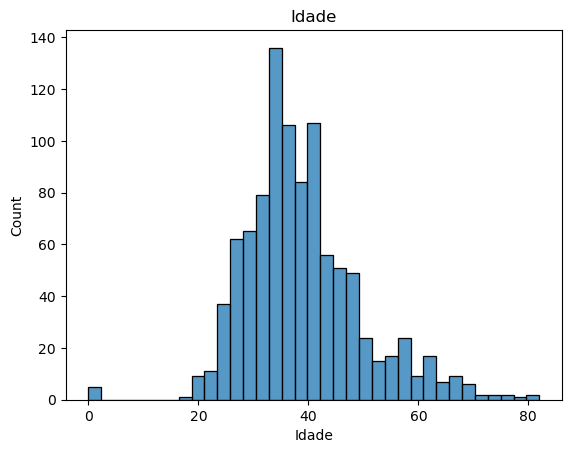

In [47]:
srn.histplot(dataset['Idade']).set_title('Idade')

In [48]:
dataset['Idade'].describe()

count     995
unique     61
top        36
freq       59
Name: Idade, dtype: int64

In [49]:
dataset.loc[dataset['Genero'] == 'Feminino']

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
989,991,722,RS,Feminino,49,3,16819766,1,1,0,14076557.0,1
991,993,615,RS,Feminino,35,2,9744002,2,1,1,1398161.0,0
992,994,752,PR,Feminino,42,3,6504608,2,0,1,14013928.0,0
993,995,661,SC,Feminino,28,7,9535749,1,0,0,10229715.0,0


In [73]:
dataset.drop_duplicates(subset= 'Id', keep= 'first', inplace= True)

In [75]:
#verificando registros errados na coluna de Estado como TD, SP e RP
dataset.groupby(['Estado']).size()

Estado
PR    256
RP      1
RS    476
SC    257
SP      4
TD      1
dtype: int64

In [77]:
#atribuindo esses registros à moda (RS)
dataset.loc[dataset['Estado'].isin(['RP','TD', 'SP']),'Estado'] = 'RS'

In [78]:
#verificando o resultado
dataset.groupby(['Estado']).size()

Estado
PR    256
RS    482
SC    257
dtype: int64

In [79]:
desv = sts.stdev(dataset['Salario'])
desv

529785208.99863595

In [81]:
dataset.loc[dataset['Salario'] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,11934688000.0,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,11563829000.0,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1640178900.0,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1119811900.0,0


In [82]:
medianasalario = sts.median(dataset['Salario'])
medianasalario

8609923.0

In [83]:
dataset.loc[dataset['Salario'] > 2 * desv] = medianasalario


In [84]:
dataset.loc[dataset['Salario'] > 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu


In [85]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [88]:
dataset.shape


(995, 12)

In [95]:
dataset.loc[dataset['Estado'] == 8609923.0]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
7,8609923.0,8609923.0,8609923.0,8609923.0,37,8609923.0,8609923.0,8609923.0,8609923.0,8609923.0,8609923.0,8609923.0
116,8609923.0,8609923.0,8609923.0,8609923.0,37,8609923.0,8609923.0,8609923.0,8609923.0,8609923.0,8609923.0,8609923.0
170,8609923.0,8609923.0,8609923.0,8609923.0,37,8609923.0,8609923.0,8609923.0,8609923.0,8609923.0,8609923.0,8609923.0
230,8609923.0,8609923.0,8609923.0,8609923.0,37,8609923.0,8609923.0,8609923.0,8609923.0,8609923.0,8609923.0,8609923.0
